# EDA

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

df_train = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/train.csv") # insert file path
df_test = pd.read_csv("C:/Users/maxpi/Desktop/Universität/Machine Learning/groupproject/archive (2)/test.csv") # insert file path

df = pd.concat([df_test,df_train], ignore_index=True)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [36]:
df.columns

Index(['id', 'levy', 'manufacturer', 'model', 'prod._year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags', 'price'],
      dtype='object')

#### Numerical Overview

In [37]:
print(df.describe())

                 id    prod._year     cylinders       airbags         price
count  2.748200e+04  27482.000000  27482.000000  27482.000000  1.923700e+04
mean   4.557857e+07   2010.912452      4.593734      6.563569  1.855593e+04
std    9.244972e+05      5.632865      1.413918      4.329256  1.905813e+05
min    2.074688e+07   1939.000000      1.000000      0.000000  1.000000e+00
25%    4.569808e+07   2009.000000      4.000000      4.000000  5.331000e+03
50%    4.577207e+07   2012.000000      4.000000      6.000000  1.317200e+04
75%    4.580197e+07   2015.000000      4.000000     12.000000  2.207500e+04
max    4.581665e+07   2020.000000    127.000000     16.000000  2.630750e+07


#### Display The First 5 Rows

In [38]:
print(df.head())

         id levy manufacturer   model  prod._year   category leather_interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  fuel_type engine_volume    mileage  cylinders gear_box_type drive_wheels  \
0    Diesel     2.0 Turbo       0 km        4.0        Manual        Front   
1    Petrol           2.4   26000 km        4.0     Tiptronic        Front   
2    Petrol           1.5  168000 km        4.0     Automatic        Front   
3    Petrol           3.2  143000 km        6.0     Automatic          4x4   
4    Petrol           1.6  200000 km        4.0        Manual        Front   

    doors             wheel     color  airba

#### Column Information and Shape

In [39]:
print(df.info())
print("Dataframe Shape:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                27482 non-null  int64  
 1   levy              27482 non-null  object 
 2   manufacturer      27482 non-null  object 
 3   model             27482 non-null  object 
 4   prod._year        27482 non-null  int64  
 5   category          27482 non-null  object 
 6   leather_interior  27482 non-null  object 
 7   fuel_type         27482 non-null  object 
 8   engine_volume     27482 non-null  object 
 9   mileage           27482 non-null  object 
 10  cylinders         27482 non-null  float64
 11  gear_box_type     27482 non-null  object 
 12  drive_wheels      27482 non-null  object 
 13  doors             27482 non-null  object 
 14  wheel             27482 non-null  object 
 15  color             27482 non-null  object 
 16  airbags           27482 non-null  int64 

#### MissingValues

In [40]:
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
id                     0
levy                   0
manufacturer           0
model                  0
prod._year             0
category               0
leather_interior       0
fuel_type              0
engine_volume          0
mileage                0
cylinders              0
gear_box_type          0
drive_wheels           0
doors                  0
wheel                  0
color                  0
airbags                0
price               8245
dtype: int64


### Data Cleaning

Some rows include add-ons like "Turbo" in the column engine volume. In order to have a more consistent dataset, these added comments are deleted.
The column mileage includes the metric "km", to enable further computation, this is deleted and only the value is left.

In [41]:
# Function to extract the numeric part of a string
def extract_number(x):
    # Use regex to find the first occurrence of a float or integer in the string
    import re
    match = re.search(r'(\d+\.?\d*)', str(x))
    return match.group(1) if match else None

# Clean the engine_volume column: extract the number and convert to float
df['engine_volume'] = df['engine_volume'].apply(extract_number).astype(float)

# Clean the mileage column: extract the number and convert to float
df['mileage'] = df['mileage'].apply(extract_number).astype(float)


#### Delete Outliers

The previous analysis showed some extreme values. To make sure all data in the dataset is insightful, rows with the following values are deleted:
- Price more than 1.000.000
- Price under 100
- Price not listed
- More than 16 cylinders
- Mileage more than 1.000.000

In [42]:
# Delete outliers
# Delete all entries with price > 1.000.000, price < 100, no price listed, or cylinders > 16
conditions = ((df["price"] > 1000000) | (df["cylinders"] > 16) | (df["price"]<100) | (df["price"].isnull()) | (df["mileage"] > 1000000))
df_deleted = df[conditions].copy()
print(df_deleted)

df = df[~conditions].copy()
print(df.shape)

             id  levy   manufacturer    model  prod._year   category  \
0      44020629     -     VOLKSWAGEN     Golf        2012  Hatchback   
1      45784798     -        HYUNDAI   Sonata        2012      Sedan   
2      45800257     -         NISSAN    Tiida        2005      Sedan   
3      45797981   975          VOLVO     XC90        2012       Jeep   
4      45814303     -           OPEL    Astra        1993  Hatchback   
...         ...   ...            ...      ...         ...        ...   
27409  45040734     -         TOYOTA    Prius        2013      Sedan   
27412  45799423  1995           FORD  Transit        2003   Microbus   
27444  45761409     -  MERCEDES-BENZ    C 180        1995      Sedan   
27463  45748699     -         NISSAN     Note        2006  Hatchback   
27474  39977395     -         TOYOTA    Prius        2008  Hatchback   

      leather_interior fuel_type  engine_volume       mileage  cylinders  \
0                   No    Diesel            2.0  0.000000e+

#### Rework Doors Column

The column doors is flawful and has values which are not insightful, thus it will be reworked.

In [43]:
print(df["doors"].value_counts())
df["doors"] = df["doors"].replace({'04-May' : 5, '>5' : 5, '02-Mar' : 3} )
print(df["doors"].value_counts())

doors
04-May    17924
02-Mar      765
>5          121
Name: count, dtype: int64
doors
5    18045
3      765
Name: count, dtype: int64


C:\Users\maxpi\AppData\Local\Temp\ipykernel_21396\3703098987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["doors"] = df["doors"].replace({'04-May' : 5, '>5' : 5, '02-Mar' : 3} )


#### Duplicates

Checking for and deleting of duplicates

In [44]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)



Number of duplicate rows: 305


In [45]:
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


#### Missing Values 2

Check if the previous steps eliminated all rows with missing values

In [46]:
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
id                  0
levy                0
manufacturer        0
model               0
prod._year          0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
price               0
dtype: int64


In [47]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Define lists of numeric and categorical columns for analysis
numeric_cols = ['prod._year','engine_volume', 'mileage', 'cylinders', 'airbags', 'price']
categorical_cols = ['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type',
                    'gear_box_type', 'drive_wheels', 'wheel', 'color', 'doors']

C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


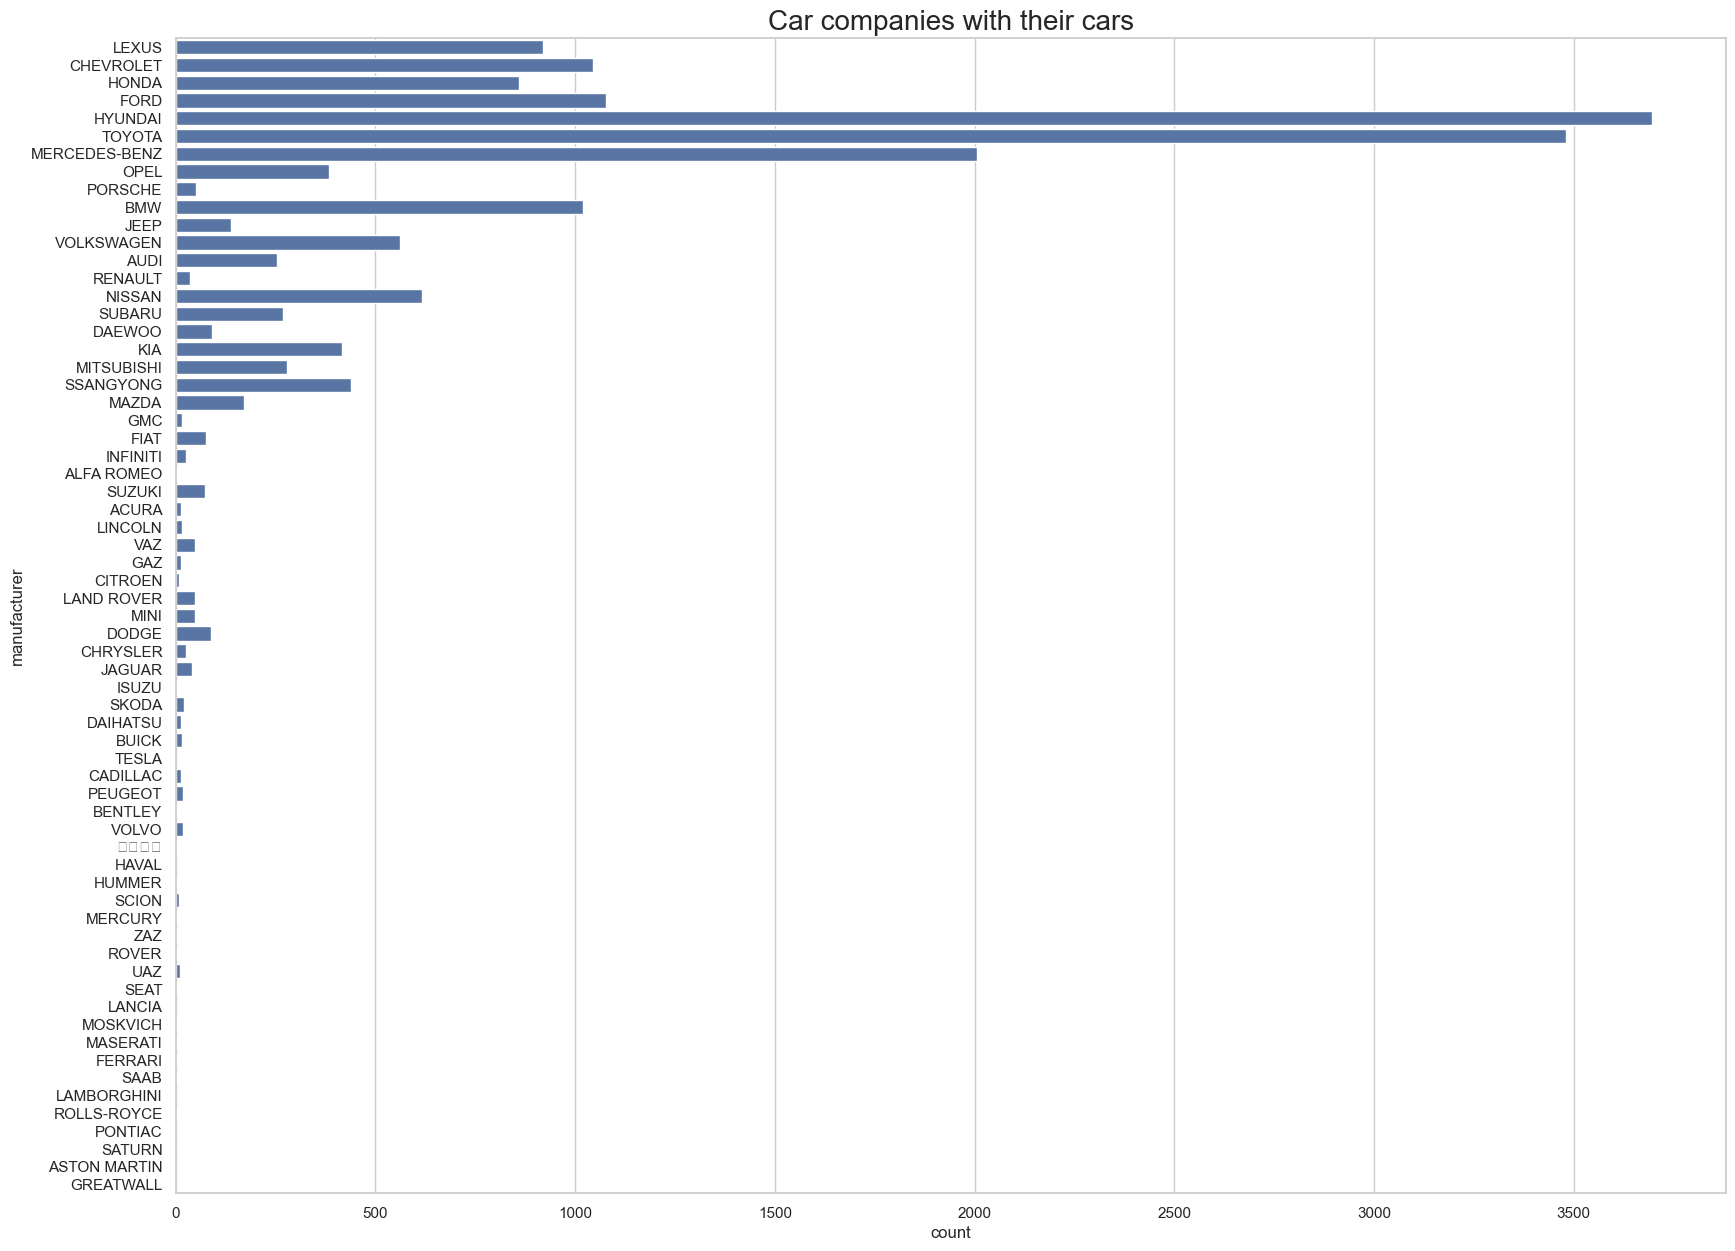

In [48]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.manufacturer)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

###  Numerical Variable Analysis

#### Histograms for all numeric colums

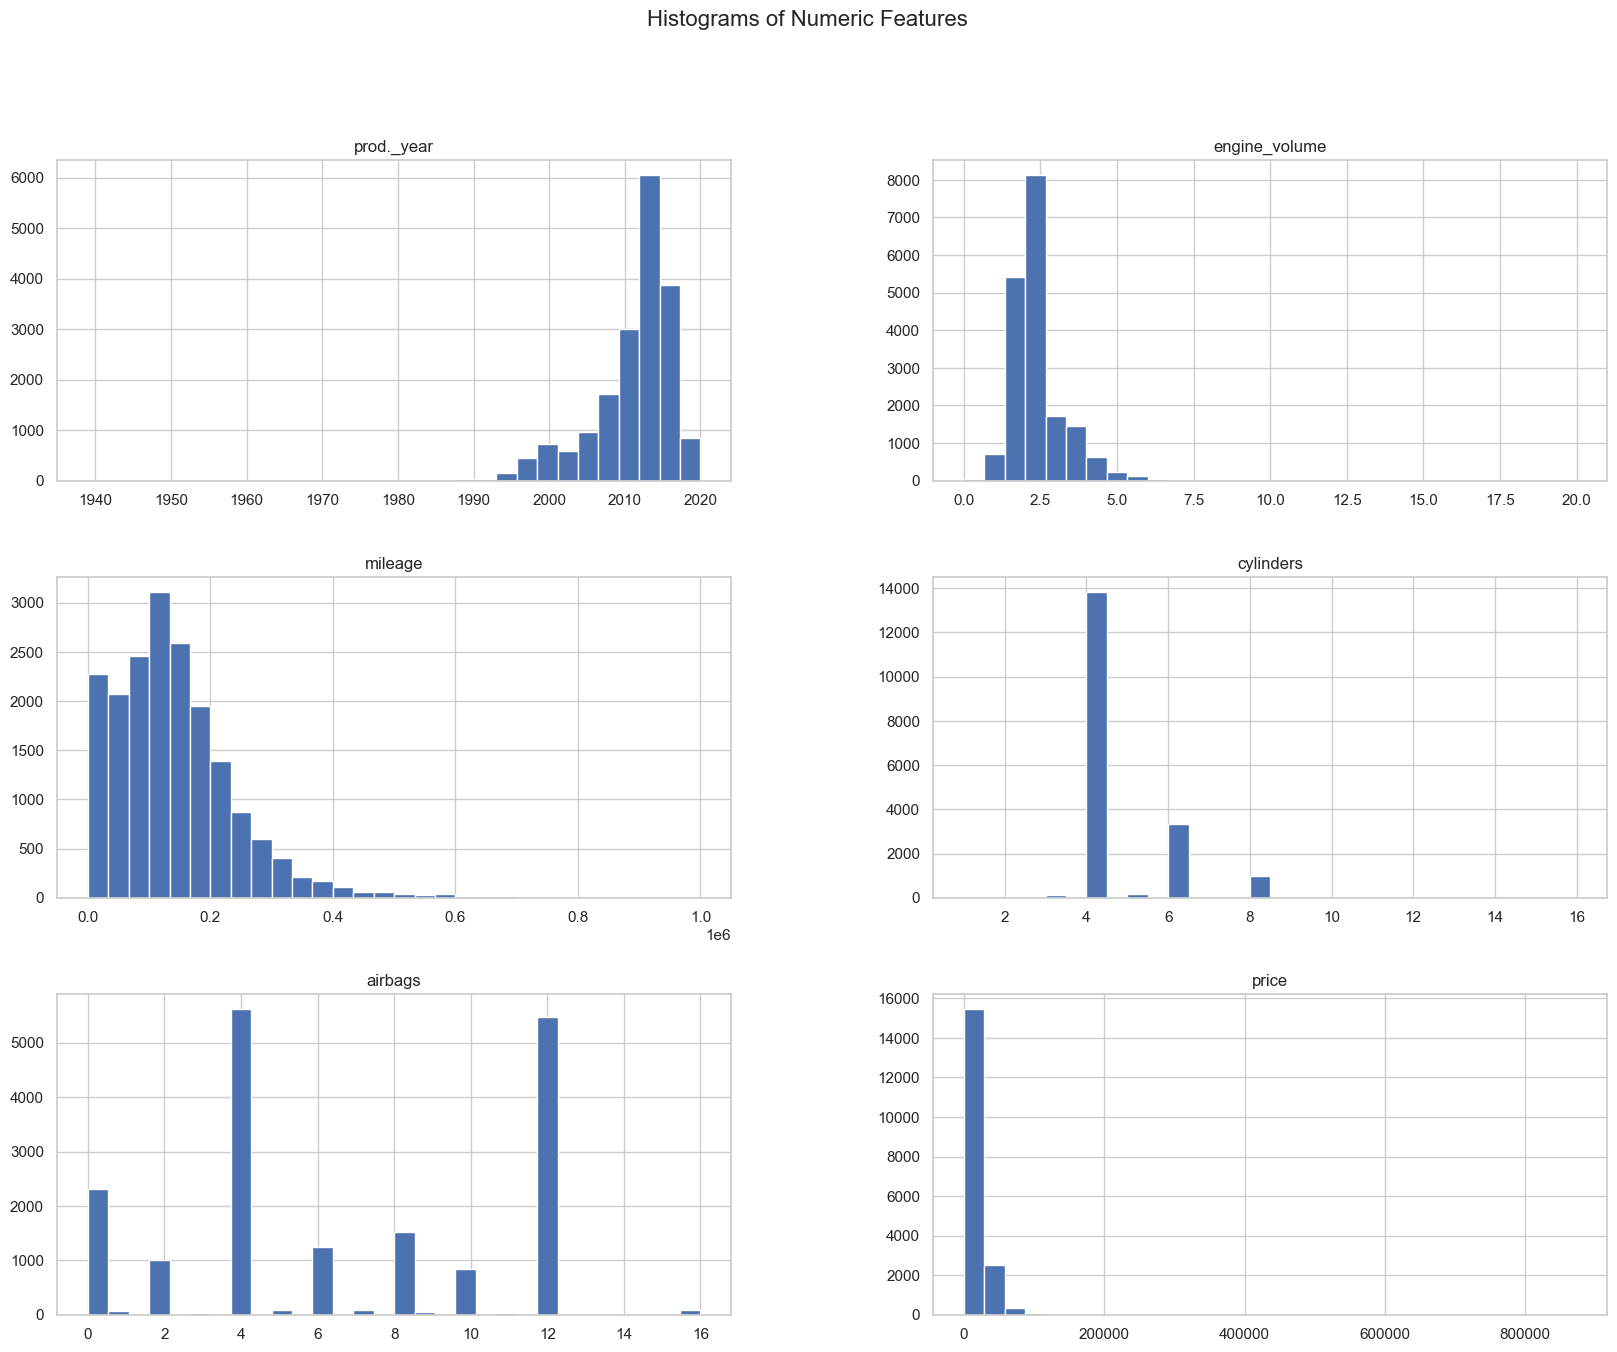

In [49]:
# Histograms for all numeric columns
df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

### 1. Production Year
- The majority of the cars were produced after the year 2000, with a strong peak between 2010 and 2020.
- There are very few cars from earlier decades, indicating that the dataset primarily consists of relatively new vehicles.

### 2. Engine Volume
- Most cars have an engine volume around 2.0L to 3.0L.
- There are a few outliers with significantly larger engine volumes, possibly indicating luxury or high-performance vehicles.
-
### 3. Mileage
- The distribution of mileage is right-skewed, meaning most cars in the dataset have relatively lower mileage.
- The majority of vehicles have mileage values below 200,000 km, with the highest frequency occurring around the lower mileage range.
- There are very few cars with extremely high mileage, suggesting that most listings include vehicles that are still in reasonable condition.
- The data appears cleaner compared to the previous version, but further checks should be done to ensure there are no incorrect values or formatting issues.


### 4. Cylinders
- The majority of cars have 4-cylinder engines, which is standard for most vehicles.
- There are smaller peaks at 6 and 8 cylinders, likely representing performance and luxury cars.

### 5. Airbags
- The most common number of airbags in the dataset appears to be 4 and 12.
- There are some entries with 0 airbags, which might indicate older models or potential data errors.

### 6. Price
- The price distribution is highly skewed, with most cars having lower prices.
- There are a few extreme outliers, possibly representing luxury or exotic cars.
- Further outlier analysis and potential log transformation may help improve price predictions.

#### Boxplot for Price

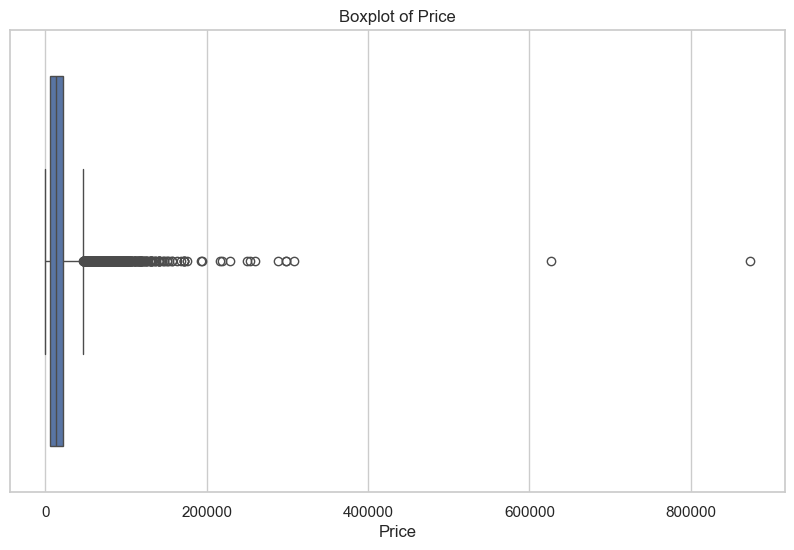

In [50]:
# Boxplot for price to visualize outliers
plt.figure()
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

#### Price
- The price distribution exhibits a significant number of outliers, with a large concentration of values on the lower end.
- Most vehicle prices fall within a relatively small range, but there are extreme high-price outliers extending beyond 800,000.
- The presence of these extreme values suggests that luxury or exotic cars are included in the dataset.
- The distribution is highly skewed, which may impact model performance. Applying a logarithmic transformation or capping extreme values might improve price prediction accuracy.
- Further investigation is needed to determine if these high prices are valid listings or potential data entry errors.


### Average Price Per Manufacturer

C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\maxpi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


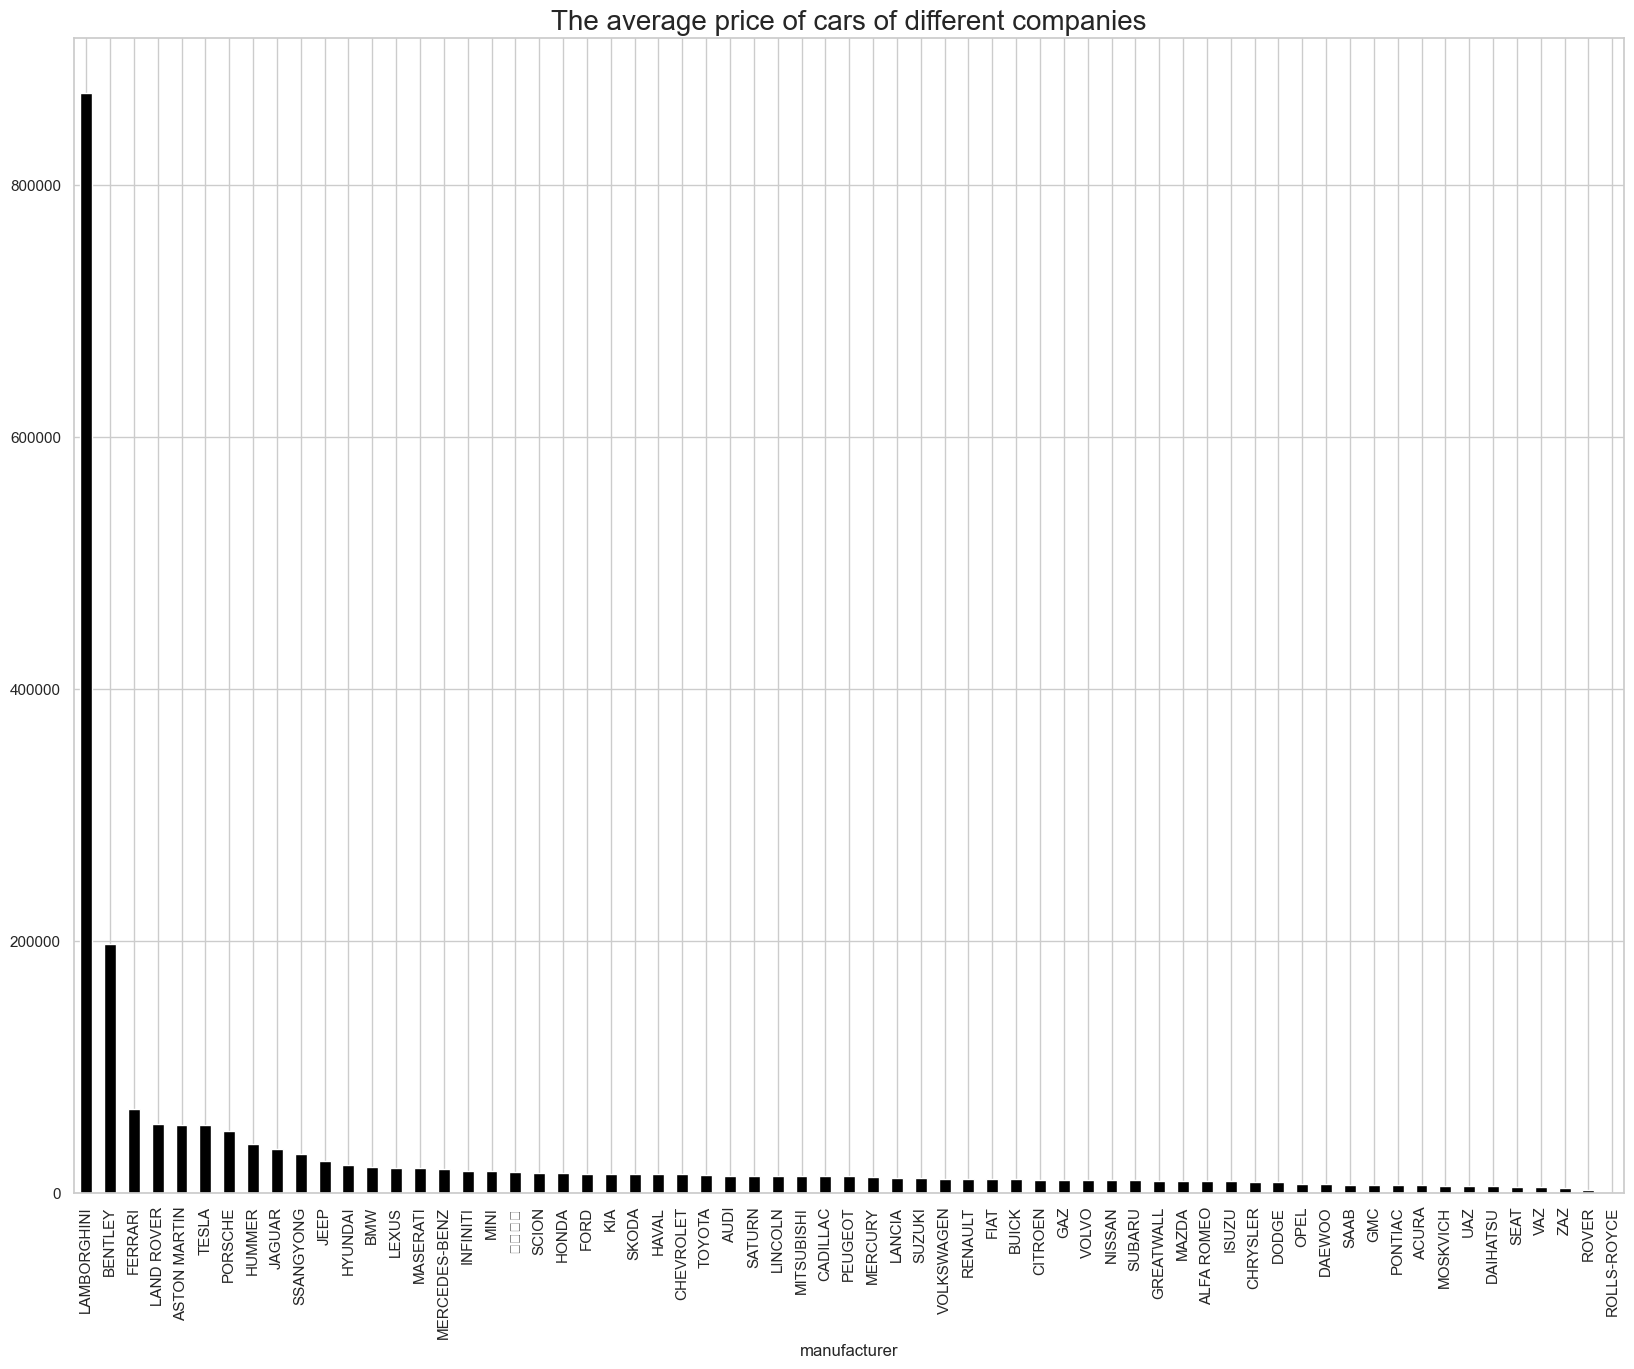

In [51]:
# Plot average price by manufacturer
plt.figure(figsize=(20, 15))
df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='black')
plt.title("The average price of cars of different companies", fontsize=20)
plt.show()


### Scatter plots for numeric features vs. Price

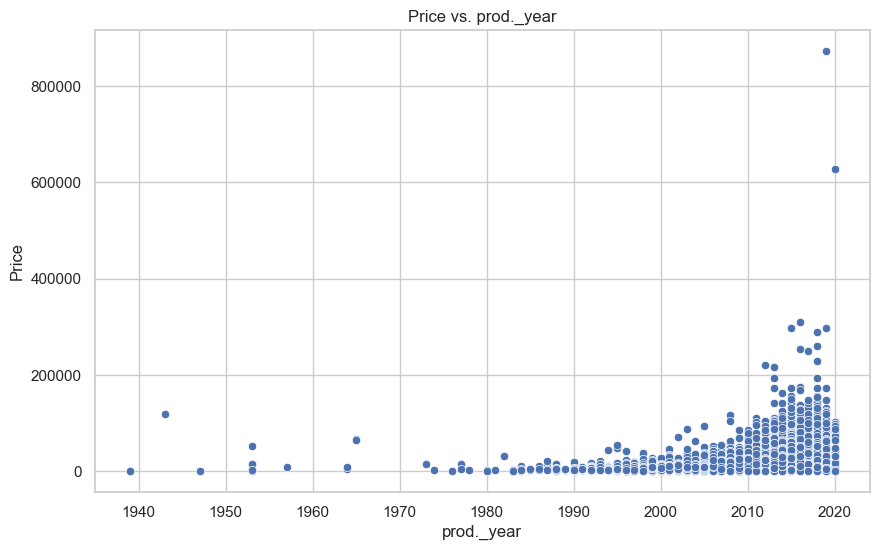

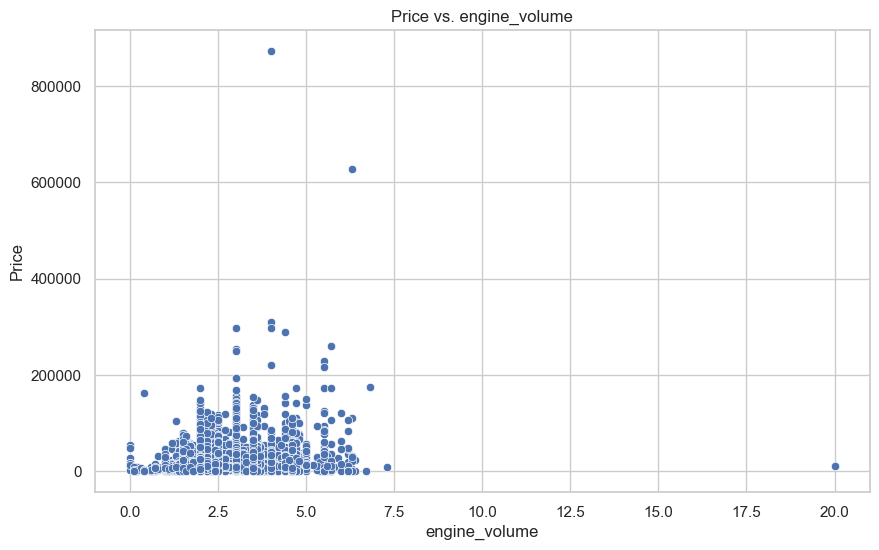

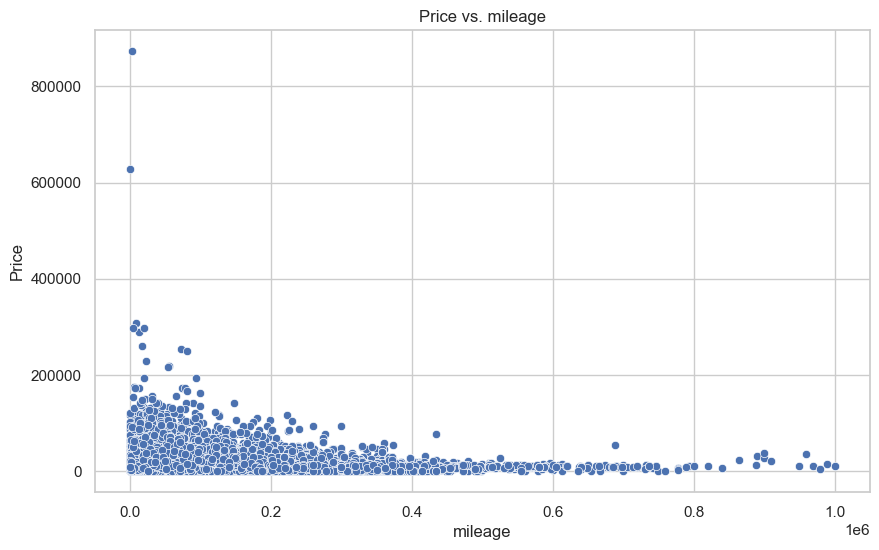

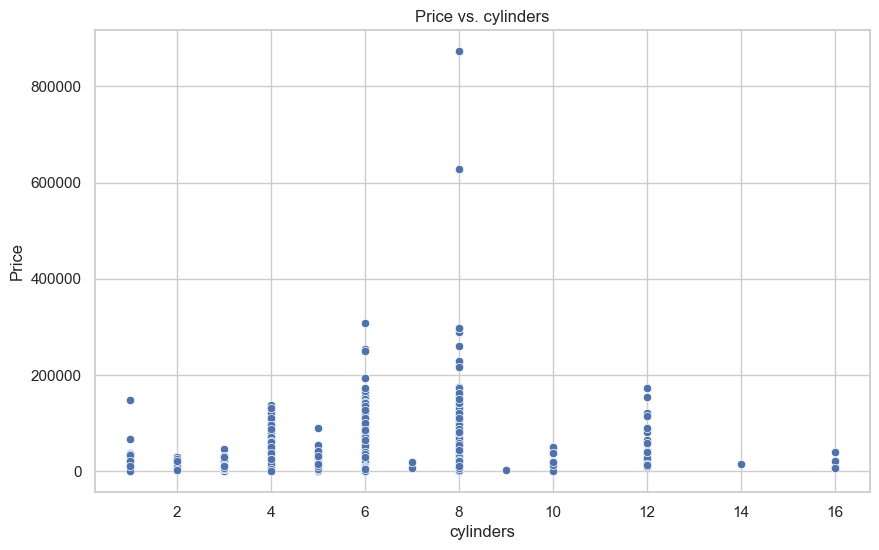

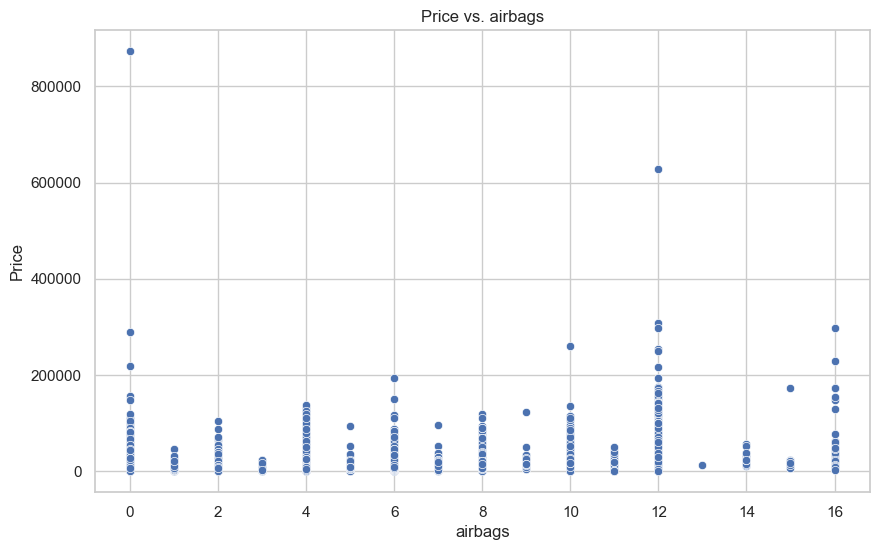

In [52]:
for col in numeric_cols:
    if col != 'price':
        plt.figure()
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Price vs. {col}')
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()

## Bivariate Analysis: Price vs. Key Features

### 1. Price vs. Production Year
- Newer cars tend to have higher prices, with a noticeable upward trend in recent years.
- There are a few older cars (pre-1980) with high prices, likely representing rare or classic models.
- Most high-price listings are concentrated in vehicles produced after 2010.

### 2. Price vs. Engine Volume
- The majority of vehicles in the dataset have engine volumes below 5.0L.
- Higher engine volumes do not necessarily correlate with higher prices, though some expensive cars have larger engines.
- A few extreme values exist, particularly for vehicles with very high engine volumes.

### 3. Price vs. Mileage
- There is a strong negative correlation between mileage and price, with lower mileage cars generally having higher prices.
- High-mileage cars tend to be lower in price, though there are exceptions where certain high-mileage vehicles still hold significant value.
- Some outliers exist where low-mileage cars are listed at extreme prices.

### 4. Price vs. Cylinders
- Most vehicles in the dataset have 4-cylinder engines, with some high-price listings in this category.
- Cars with 6, 8, and 12 cylinders tend to be more expensive, though there are exceptions.
- The relationship between cylinders and price is not strictly linear, suggesting other factors influence price.

### 5. Price vs. Airbags
- The number of airbags varies significantly across the dataset.
- More airbags do not always correlate with higher prices, though luxury vehicles often have more safety features.
- Some high-price cars have relatively few airbags, possibly indicating classic or performance cars where safety is not the main priority.

### Key Takeaways:
- **Strong Correlations:** Price shows clear trends with production year (newer = higher price) and mileage (higher mileage = lower price).
- **Weaker Correlations:** Features like engine volume, cylinders, and airbags impact price but with more


### Categorical Variable Analysis

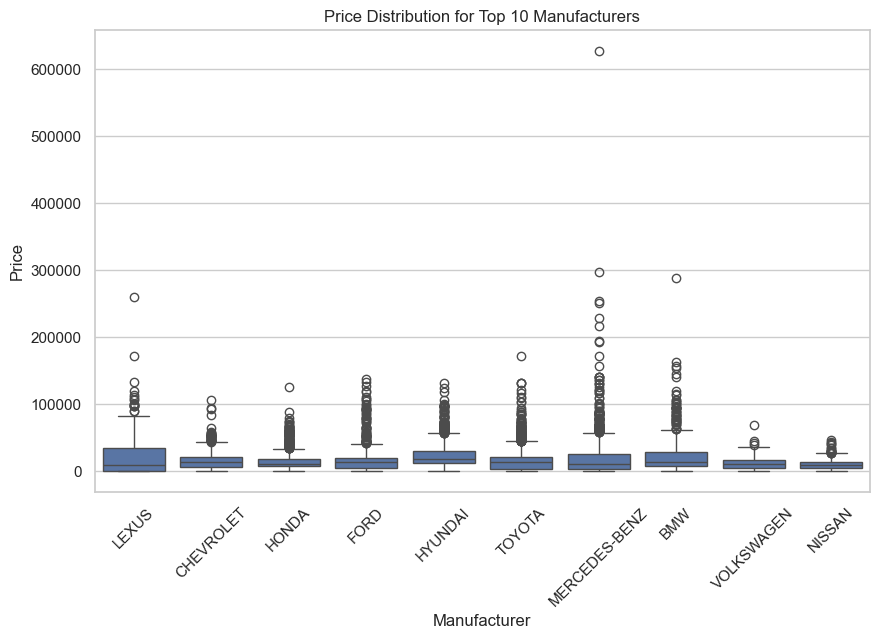

In [53]:
# Analyze price distribution across some key categorical variables
# For instance, examine 'manufacturer' for the top 10 manufacturers
top_manufacturers = df['manufacturer'].value_counts().nlargest(10).index
plt.figure()
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_manufacturers)])
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.show()

## Price Distribution Across Top 10 Manufacturers

- The boxplot shows significant variation in car prices across the top 10 manufacturers.
- **Lexus, Mercedes-Benz, and BMW** tend to have higher median prices compared to other brands, indicating their position in the premium and luxury segment.
- **Toyota, Hyundai, Honda, and Nissan** generally have lower median prices, aligning with their positioning as more affordable and mass-market brands.
- **Mercedes-Benz and Lexus** show the widest price range, with several extreme outliers suggesting the presence of high-end or specialty models.
- **All manufacturers have numerous outliers**, likely representing luxury, rare, or high-performance models that significantly exceed the standard price range.
- The **overall price distribution is right-skewed**, reinforcing previous observations that most cars in the dataset are relatively affordable, but a small percentage command extremely high prices.



#### Barplot of Categorical Variables vs. Price

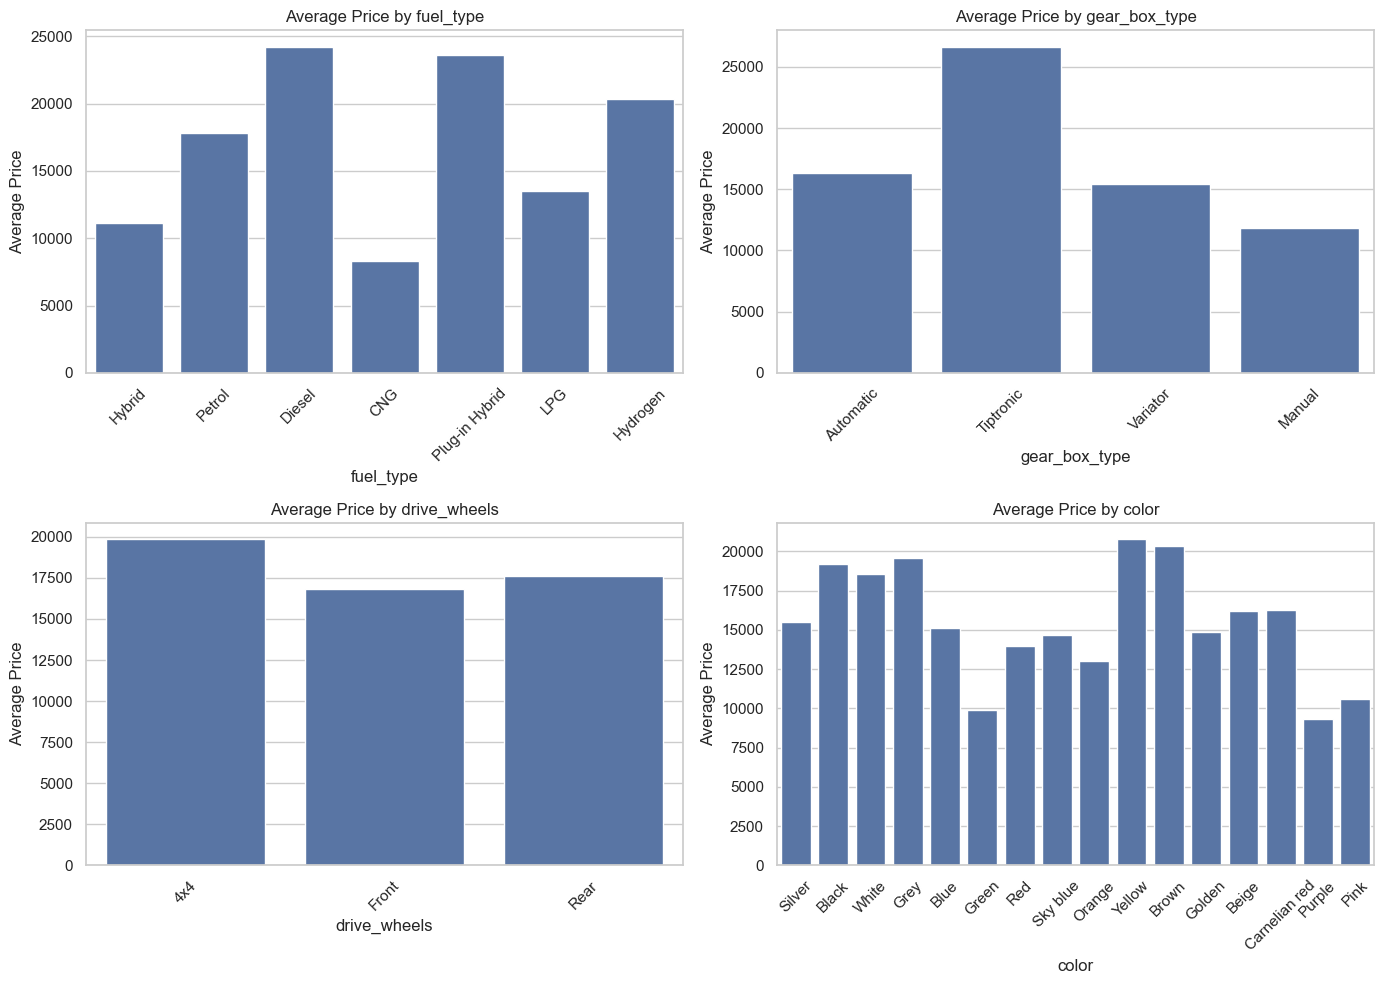

In [54]:
# Bar plots for average price by other categorical variables
fig, axes = plt.subplots(nrows=(len(['fuel_type', 'gear_box_type', 'drive_wheels', 'color']) + 1) // 2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(['fuel_type', 'gear_box_type', 'drive_wheels', 'color']):
    sns.barplot(ax=axes[i], x=col, y='price', data=df, errorbar=None)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Average Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Average Price")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Price Analysis by Categorical Features

### 1. Average Price by Fuel Type
- **Diesel and Plug-in Hybrid vehicles** have the highest average prices, indicating they may be associated with newer or premium models.
- **Hydrogen and Petrol cars** also show relatively high average prices
- **CNG and LPG cars** have the lowest average prices, suggesting they are more common in budget-friendly or economy segments.

### 2. Average Price by Gearbox Type
- **Tiptronic gearboxes** are associated with the highest average prices, likely due to their prevalence in premium and high-performance vehicles.
- **Automatic and Variator transmissions** also command higher prices, which aligns with the market preference for automatic transmissions in modern and luxury vehicles.
- **Manual transmissions** have the lowest average price, reflecting their association with older or more affordable cars.

### 3. Average Price by Drive Wheels
- **4x4 vehicles** have the highest average price, which is expected as many SUVs, off-road, and premium vehicles feature this drivetrain.
- **Rear-wheel drive (RWD) and Front-wheel drive (FWD) cars** have similar average prices, but FWD cars are generally associated with economy vehicles, while RWD is more common in performance and luxury cars.

### 4. Average Price by Color
- **Brown and Yellow vehicles** have the highest average prices, which may indicate they are associated with luxury or less common, high-end models.
- **Black, White, and Grey cars** are among the most expensive, aligning with their popularity in premium and executive vehicles.
- **Green and Purple cars** have the lowest average prices, possibly due to lower demand and their presence in older or budget-friendly models.

### Key Insights:
- Certain fuel types and gearboxes (e.g., Diesel, Plug-in Hybrid, Tiptronic) correlate with higher prices, indicating they may be key factors in price prediction.
- Drive type also plays a role, with 4x4 vehicles being the most expensive.
- Uncommon colors like Brown and Yellow show higher prices, possibly indicating niche or luxury models.
- Further analysis is needed to determine if these patterns hold when controlling for other factors like manufacturer and model.



### Correlation Analysis

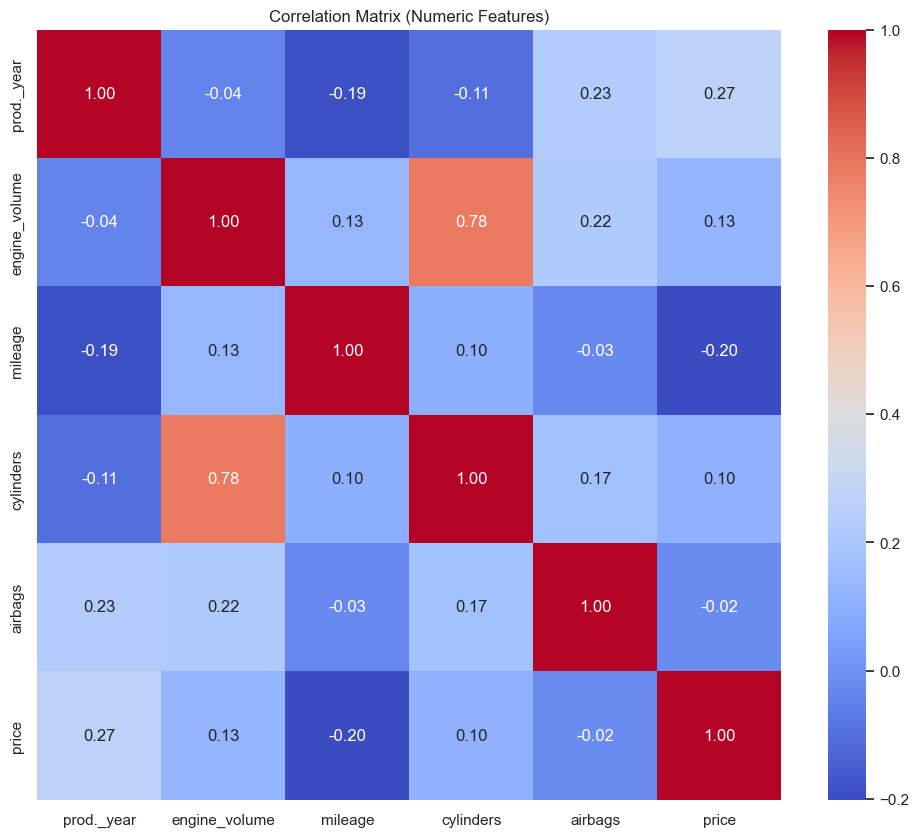

In [55]:
# Compute correlation matrix for numeric features
corr = df[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


Correlation of Features with Price:
price            1.000000
prod._year       0.266770
engine_volume    0.126525
cylinders        0.104297
airbags         -0.022571
mileage         -0.201406
Name: price, dtype: float64


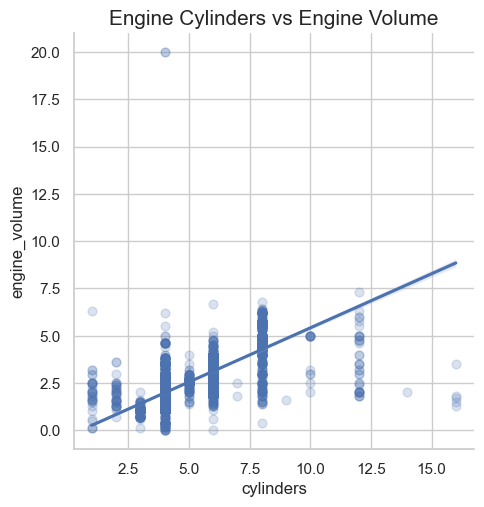

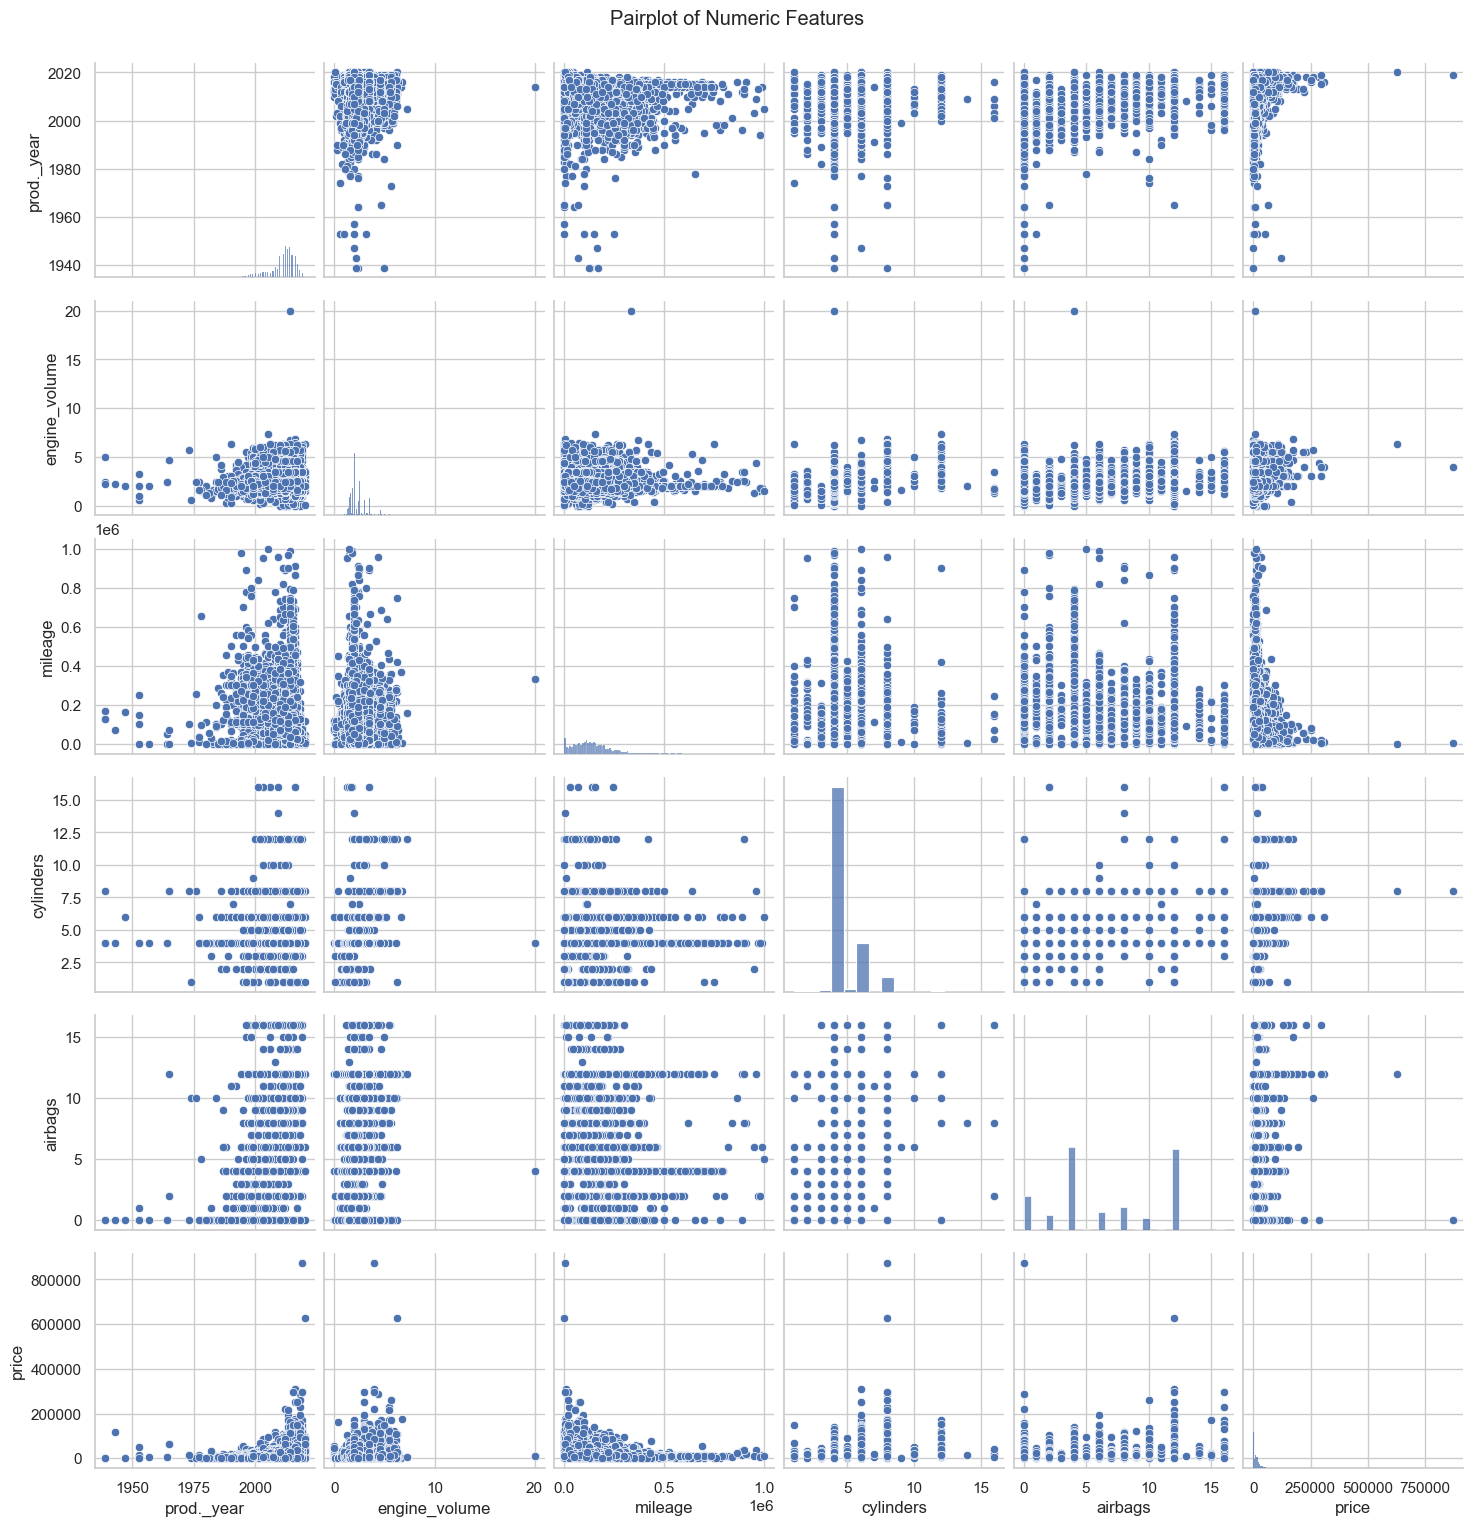

In [56]:
# Print correlations with price (sorted)
corr_target = corr['price'].sort_values(ascending=False)
print("\nCorrelation of Features with Price:")
print(corr_target)

sns.lmplot(x = 'cylinders', y = 'engine_volume', scatter_kws = {"s": 40, "alpha": 0.2}, data = df)
plt.title("Engine Cylinders vs Engine Volume", fontsize = 15)
plt.show()

# Pairplot for numeric features
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()



## Correlation

- **Production Year vs. Price (0.27):**
  - There is a **moderate positive correlation**, suggesting newer cars tend to have higher prices.
  - However, the correlation is not very strong, indicating other factors also influence price.

- **Mileage vs. Price (-0.20):**
  - A **weak negative correlation** exists, meaning higher mileage slightly reduces price.
  - The impact of mileage on price is lower than expected, possibly due to missing variables like car condition or brand.

- **Engine Volume vs. Price (0.13) and Cylinders vs. Price (0.10):**
  - These weak positive correlations suggest that while larger engines and more cylinders slightly increase price, they are not major determinants.
  - Engine volume and cylinders have a **strong internal correlation (0.78)**, meaning they often change together.

- **Airbags vs. Price (-0.02, negligible correlation):**
  - The number of airbags does not significantly impact car prices.

- **Production Year vs. Price:**
  - A clear **trend of increasing prices for newer cars** is visible.
  - Older cars show lower prices, with exceptions for some classic or rare vehicles.

- **Mileage vs. Price:**
  - High-mileage cars tend to have lower prices, but there are several high-priced cars with high mileage, possibly indicating premium or collector models.

- **Price Distribution:**
  - The price variable is highly **right-skewed**, with most cars clustered at lower prices and a few extreme outliers.

